In [2]:
path1= 's3://haseebdata/EDNET DATA/Ednet feather files/KT1.ftr'
path3 = 's3://haseebdata/EDNET DATA/Ednet feather files/KT3.ftr'

In [3]:
KT1 = pd.read_feather(path1)
KT3 = pd.read_feather(path3)

In [4]:
questions = pd.read_csv('s3://haseebdata/EDNET DATA/EDNET Content CSV/questions.csv')

In [5]:
KT1.head()

,timestamp,solving_id,question_id,user_answer,elapsed_time,user_iD
0,1565096190868,1,q5012,b,38000,1
1,1565096221062,2,q4706,c,24000,1
2,1565096293432,3,q4366,b,68000,1
3,1565096339668,4,q4829,a,42000,1
4,1565096401774,5,q6528,b,59000,1


In [6]:
KT3.head()

,timestamp,action_type,item_id,source,user_answer,platform,user_iD
0,2019-08-06 12:55:51.269,enter,b3544,diagnosis,None,mobile,1
1,2019-08-06 12:56:27.972,respond,q5012,diagnosis,b,mobile,1
2,2019-08-06 12:56:34.904,submit,b3544,diagnosis,None,mobile,1
3,2019-08-06 12:56:35.001,enter,b3238,diagnosis,None,mobile,1
4,2019-08-06 12:56:58.682,respond,q4706,diagnosis,c,mobile,1


In [7]:
questions.head()

,question_id,bundle_id,explanation_id,correct_answer,part,tags,deployed_at
0,q1,b1,e1,b,1,1;2;179;181,1558093217098
1,q2,b2,e2,a,1,15;2;182,1558093219720
2,q3,b3,e3,b,1,14;2;179;183,1558093222784
3,q4,b4,e4,b,1,9;2;179;184,1558093225357
4,q5,b5,e5,c,1,8;2;179;181,1558093228439


In [8]:
K3_userid_counts = KT3.user_iD.value_counts()
mask = K3_userid_counts >= 30
KT3_userids = mask[mask].index

K3 = KT3[KT3.user_iD.isin(KT3_userids)]

In [9]:
K3.head()

,timestamp,action_type,item_id,source,user_answer,platform,user_iD
0,2019-08-06 12:55:51.269,enter,b3544,diagnosis,None,mobile,1
1,2019-08-06 12:56:27.972,respond,q5012,diagnosis,b,mobile,1
2,2019-08-06 12:56:34.904,submit,b3544,diagnosis,None,mobile,1
3,2019-08-06 12:56:35.001,enter,b3238,diagnosis,None,mobile,1
4,2019-08-06 12:56:58.682,respond,q4706,diagnosis,c,mobile,1


In [10]:
A = K3.loc[K3['action_type'].isin(['respond'])]
A.head()

,timestamp,action_type,item_id,source,user_answer,platform,user_iD
1,2019-08-06 12:56:27.972,respond,q5012,diagnosis,b,mobile,1
4,2019-08-06 12:56:58.682,respond,q4706,diagnosis,c,mobile,1
7,2019-08-06 12:58:10.094,respond,q4366,diagnosis,b,mobile,1
10,2019-08-06 12:58:57.361,respond,q4829,diagnosis,a,mobile,1
13,2019-08-06 12:59:55.328,respond,q6528,diagnosis,b,mobile,1


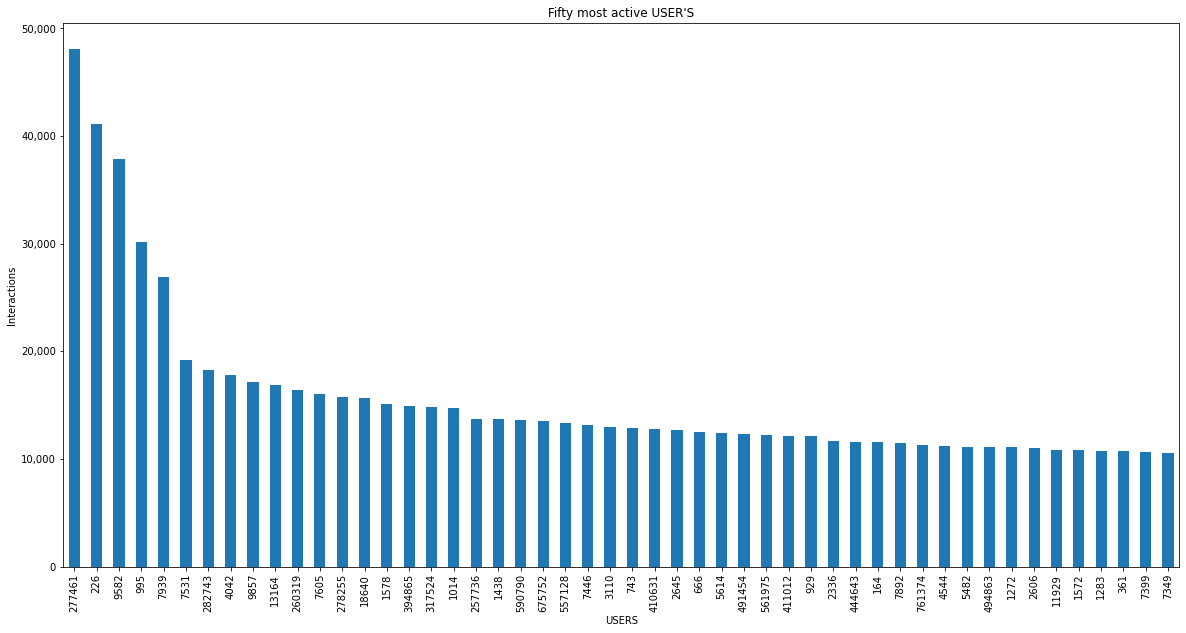

In [12]:
cids = A.user_iD.value_counts()[:50]

fig = plt.figure(figsize=(20,10))
ax = cids.plot.bar()
plt.title("Fifty most active USER'S")
plt.xticks(rotation=90)
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ','))) #add thousands separator
plt.xlabel('USERS')
plt.ylabel('Interactions')
plt.show()


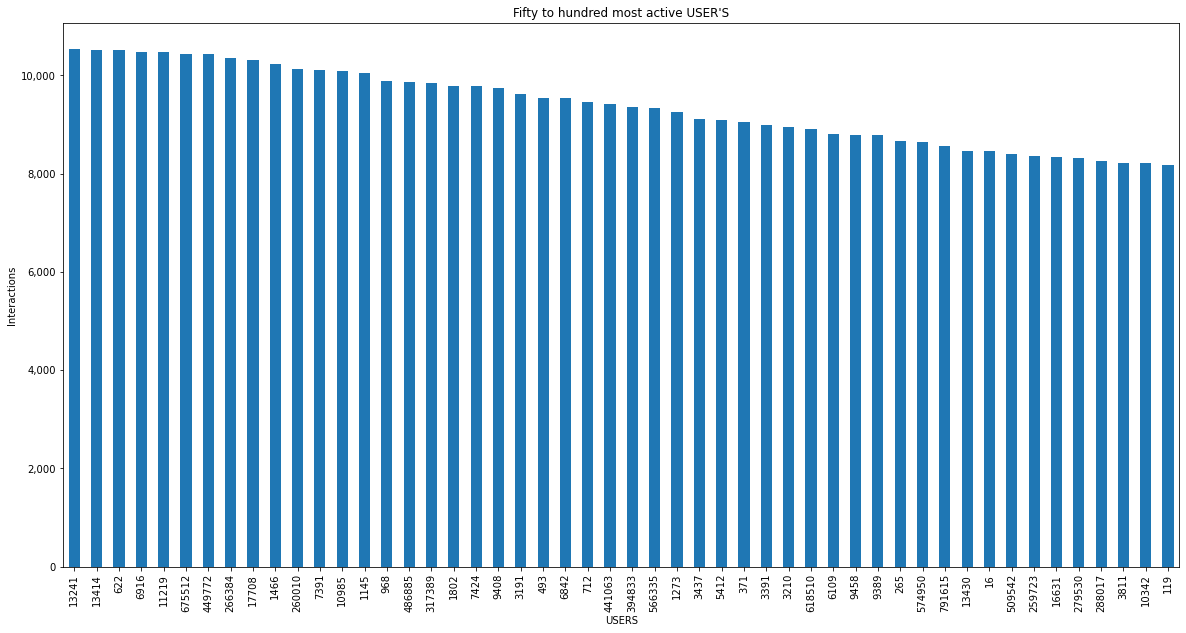

In [13]:
cids = A.user_iD.value_counts()[50:100]

fig = plt.figure(figsize=(20,10))
ax = cids.plot.bar()
plt.title("Fifty to hundred most active USER'S")
plt.xticks(rotation=90)
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ','))) #add thousands separator
plt.xlabel('USERS')
plt.ylabel('Interactions')
plt.show()


In [ ]:
output_dict1 = {"bundle_id": [], "question_id": [], "correct": [], "incorrect": []}
#output_dict2 = {"bundle_id": [], "question_count": [], "correct": [], "incorrect": []}
for b_id in qDF['bundle_id'].unique():
    output_dict2['bundle_id'].append(b_id)
    output_dict2['question_count'].append(0)
    output_dict2['correct'].append(0)
    output_dict2['incorrect'].append(0)
    qDF_filtered_by_bundle = qDF.loc[qDF["bundle_id"]==b_id]
    item_counts = rDF['item_id'].value_counts()
    for _, qDF_row in qDF_filtered_by_bundle.iterrows():
        question = qDF_row['question_id']
        rDF_filtered_by_question = rDF.loc[rDF["item_id"]==question]
        original_answer = qDF_row['correct_answer']
        output_dict2['question_count'][-1] += 1
        for _, rDF_row in rDF_filtered_by_question.iterrows():
            user_answer = rDF_row['user_answer']
            if question not in output_dict1['question_id']:
                output_dict1['bundle_id'].append(b_id)
                output_dict1['question_id'].append(question)
                output_dict1['correct'].append(0)
                output_dict1['incorrect'].append(0)
            if user_answer == original_answer:
                output_dict1['correct'][output_dict1['question_id'].index(question)] += 1
                output_dict2['correct'][-1] += 1
            else:
                output_dict1['incorrect'][output_dict1['question_id'].index(question)] += 1
                output_dict2['incorrect'][-1] += 1
        
output1 = pd.DataFrame(data=output_dict1)
output2 = pd.DataFrame(data=output_dict2)

<AxesSubplot:>

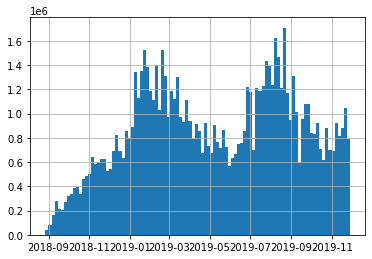

In [17]:
K3['timestamp'].hist(bins = 100)

In [27]:
Z= len(pd.value_counts(K3['item_id']))
print(Z)

29498


In [ ]:
output_dict1 = {"User_id": [], "question_id": [], "correct": [], "incorrect": []}

In [ ]:
counter_u100 = 0
for key, item_id in User100['item_id'].iteritems():
    try:
        if User100.loc[key, 'user_answer'] == questions.loc[questions['question_id'] == item_id, 'correct_answer'].values[0]:
            counter_u100 += 1
        else:
            pass  # put here whatever you want to do if the answer is wrong
    except Exception:
        pass # put here whatever you want to do if the question id from DF(B) is not in DF(questions)